In [1]:
from gensim.models import Word2Vec
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib notebook

C:\ProgramData\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


## Dane

In [35]:
sentences = []

for i in range(100000):
    start = np.random.randint(0, 20)
    finish = start + np.random.randint(1, 10)
    sentence = [str(x) for x in range(start, finish)]
    
    sentences.append(sentence)

In [ ]:
sentences

## Model Word2Vec

In [3]:
model = Word2Vec(sentences, size=10, window=5, min_count=1)

In [7]:
model.wv['1']

array([ 3.3609934 , -0.6577323 , -0.5636194 ,  3.7774    ,  4.344917  ,
       -2.5180767 , -0.64728945, -0.1878654 ,  3.165206  ,  0.94935215],
      dtype=float32)

In [13]:
def plot_heatmap(model):
    plt.figure(figsize=(15,8))
    sns.heatmap(model.wv[model.wv.vocab], linewidths=0.5);

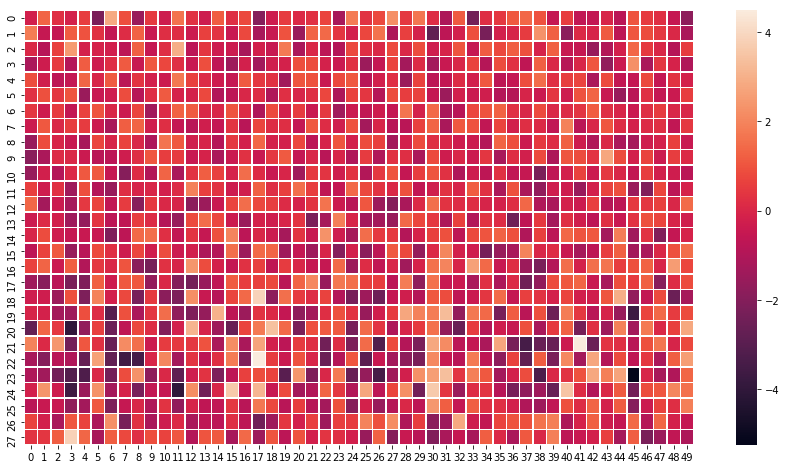

In [14]:
plot_heatmap(Word2Vec(sentences, size=50, window=10))

## PCA

In [29]:
def plot_pca(model):
    X = model.wv[model.wv.vocab]
    pca_model = PCA(n_components=2)
    result = pca_model.fit_transform(X)

    plt.figure(figsize=(8, 5))
    plt.scatter(result[:,0], result[:,1]);

    words = list(model.wv.vocab)
    for i, word in enumerate(words):
        plt.annotate(word, xy=(result[i, 0], result[i, 1]))

In [21]:
pca_model.fit_transform(X).shape

(28, 2)

In [22]:
X.shape

(28, 10)

In [23]:
result[:,0]

array([-7.4674125 , -6.185731  , -5.3928294 , -4.680202  , -4.089847  ,
       -3.5869439 , -2.5501304 , -1.7959548 , -1.857167  , -1.4950925 ,
       -0.91423404, -0.5146687 , -0.05280167,  0.38886705,  1.0407873 ,
        1.3352867 ,  2.6463282 ,  2.8366828 ,  3.8085334 ,  4.118585  ,
        4.9913797 ,  6.1715584 ,  7.1999545 ,  8.267668  ,  8.367244  ,
        4.5760875 , -7.7836313 , -7.382317  ], dtype=float32)

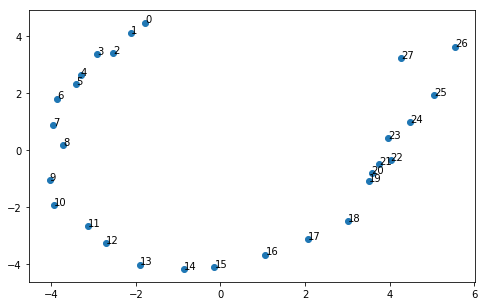

In [36]:
plot_pca(Word2Vec(sentences, size=50, window=10))

## Podobne słowa

In [37]:
model = Word2Vec(sentences, size=300, window=5)
model.wv.most_similar('4', topn=3)

[('0', 0.5605112314224243),
 ('1', 0.5599350333213806),
 ('2', 0.4986823499202728)]

In [38]:
model.wv.most_similar(positive=['10', '8'], negative=['1'], topn=3)

[('12', 0.5207327008247375),
 ('13', 0.5193585157394409),
 ('11', 0.4490225315093994)]